In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
import tensorflow as tf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

demographic_df = pd.read_csv("Resources/demographic.csv")
flavor_df = pd.read_csv("Resources/flavor.csv")
flavor_df = flavor_df.drop(['Unnamed: 0'], axis=1)
flavor_df

,total_cup_points,aroma,flavor,aftertaste,acidity,body,balance,sweetness,moisture
0,90.58,8.67,8.83,8.67,8.75,8.50,8.42,10.00,0.12
1,89.92,8.75,8.67,8.50,8.58,8.42,8.42,10.00,0.12
2,89.75,8.42,8.50,8.42,8.42,8.33,8.42,10.00,0.00
3,89.00,8.17,8.58,8.42,8.42,8.50,8.25,10.00,0.11
4,88.83,8.25,8.50,8.25,8.50,8.42,8.33,10.00,0.12
...,...,...,...,...,...,...,...,...,...
1334,78.75,7.75,7.58,7.33,7.58,5.08,7.83,7.75,0.00
1335,78.08,7.50,7.67,7.75,7.75,5.17,5.25,8.42,0.00
1336,77.17,7.33,7.33,7.17,7.42,7.50,7.17,7.42,0.00
1337,75.08,7.42,6.83,6.75,7.17,7.25,7.00,7.08,0.10


Changing String to Ints

In [3]:
countries = demographic_df['country_of_origin'].unique()
count_num = []

for x in range(len(countries)):
    count_num.append(x + 1)

countries_dict = dict(zip(countries, count_num))

demographic_df['country_id'] = demographic_df['country_of_origin'].replace(countries_dict, regex=True)
demographic_df

,Unnamed: 0.1,Unnamed: 0,country_of_origin,owner,harvest_year,grading_date,altitude,processing_method,grading_year,year_diff,country_id
0,15,25,Brazil,nucoffee,2011,12/3/2011,1250,Natural / Dry,2011,0,1
1,18,32,Brazil,nucoffee,2011,12/3/2011,1300,Natural / Dry,2011,0,1
2,26,45,Brazil,nucoffee,2011,12/3/2011,1250,Semi-washed / Semi-pulped,2011,0,1
3,46,73,Brazil,nucoffee,2011,12/3/2011,1250,Semi-washed / Semi-pulped,2011,0,1
4,65,102,Brazil,nucoffee,2012,2/29/2012,1100,Natural / Dry,2012,0,1
...,...,...,...,...,...,...,...,...,...,...,...
997,410,564,Vietnam,"sunvirtue co., ltd.",2014,1/19/2016,1040,Other,2016,2,32
998,588,790,Vietnam,royal base corporation,2012,7/23/2012,1040,Natural / Dry,2012,0,32
999,646,860,Vietnam,"sunvirtue co., ltd.",2014,12/21/2015,1040,Washed / Wet,2015,1,32
1000,838,1105,Vietnam,"sunvirtue co., ltd.",2017,5/9/2017,1550,Other,2017,0,32


In [4]:
owner = demographic_df['owner'].unique()
owner_num = []

for x in range(len(owner)):
    owner_num.append(x + 1)

owner_dict = dict(zip(owner, owner_num))

demographic_df['owner_id'] = demographic_df['owner'].replace(owner_dict, regex=True)
demographic_df

,Unnamed: 0.1,Unnamed: 0,country_of_origin,owner,harvest_year,grading_date,altitude,processing_method,grading_year,year_diff,country_id,owner_id
0,15,25,Brazil,nucoffee,2011,12/3/2011,1250,Natural / Dry,2011,0,1,1
1,18,32,Brazil,nucoffee,2011,12/3/2011,1300,Natural / Dry,2011,0,1,1
2,26,45,Brazil,nucoffee,2011,12/3/2011,1250,Semi-washed / Semi-pulped,2011,0,1,1
3,46,73,Brazil,nucoffee,2011,12/3/2011,1250,Semi-washed / Semi-pulped,2011,0,1,1
4,65,102,Brazil,nucoffee,2012,2/29/2012,1100,Natural / Dry,2012,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
997,410,564,Vietnam,"sunvirtue co., ltd.",2014,1/19/2016,1040,Other,2016,2,32,268
998,588,790,Vietnam,royal base corporation,2012,7/23/2012,1040,Natural / Dry,2012,0,32,269
999,646,860,Vietnam,"sunvirtue co., ltd.",2014,12/21/2015,1040,Washed / Wet,2015,1,32,268
1000,838,1105,Vietnam,"sunvirtue co., ltd.",2017,5/9/2017,1550,Other,2017,0,32,268


In [5]:
method = demographic_df['processing_method'].unique()
method_num = []

for x in range(len(method)):
    method_num.append(x + 1)

method_dict = dict(zip(method, method_num))

demographic_df['method_id'] = demographic_df['processing_method'].replace(method_dict, regex=True)
demographic_df

,Unnamed: 0.1,Unnamed: 0,country_of_origin,owner,harvest_year,grading_date,altitude,processing_method,grading_year,year_diff,country_id,owner_id,method_id
0,15,25,Brazil,nucoffee,2011,12/3/2011,1250,Natural / Dry,2011,0,1,1,1
1,18,32,Brazil,nucoffee,2011,12/3/2011,1300,Natural / Dry,2011,0,1,1,1
2,26,45,Brazil,nucoffee,2011,12/3/2011,1250,Semi-washed / Semi-pulped,2011,0,1,1,2
3,46,73,Brazil,nucoffee,2011,12/3/2011,1250,Semi-washed / Semi-pulped,2011,0,1,1,2
4,65,102,Brazil,nucoffee,2012,2/29/2012,1100,Natural / Dry,2012,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,410,564,Vietnam,"sunvirtue co., ltd.",2014,1/19/2016,1040,Other,2016,2,32,268,5
998,588,790,Vietnam,royal base corporation,2012,7/23/2012,1040,Natural / Dry,2012,0,32,269,1
999,646,860,Vietnam,"sunvirtue co., ltd.",2014,12/21/2015,1040,Washed / Wet,2015,1,32,268,4
1000,838,1105,Vietnam,"sunvirtue co., ltd.",2017,5/9/2017,1550,Other,2017,0,32,268,5


In [6]:
# Dropping dropping columns that are not needed
demographic_df = demographic_df.drop(['grading_date','country_of_origin', 'owner','processing_method', 'Unnamed: 0','Unnamed: 0.1'], axis=1)

demographic_df

,harvest_year,altitude,grading_year,year_diff,country_id,owner_id,method_id
0,2011,1250,2011,0,1,1,1
1,2011,1300,2011,0,1,1,1
2,2011,1250,2011,0,1,1,2
3,2011,1250,2011,0,1,1,2
4,2012,1100,2012,0,1,1,1
...,...,...,...,...,...,...,...
997,2014,1040,2016,2,32,268,5
998,2012,1040,2012,0,32,269,1
999,2014,1040,2015,1,32,268,4
1000,2017,1550,2017,0,32,268,5


In [7]:
coffee_df = pd.concat([demographic_df, flavor_df], axis=1, join='inner')
coffee_df

,harvest_year,altitude,grading_year,year_diff,country_id,owner_id,method_id,total_cup_points,aroma,flavor,aftertaste,acidity,body,balance,sweetness,moisture
0,2011,1250,2011,0,1,1,1,90.58,8.67,8.83,8.67,8.75,8.50,8.42,10.0,0.12
1,2011,1300,2011,0,1,1,1,89.92,8.75,8.67,8.50,8.58,8.42,8.42,10.0,0.12
2,2011,1250,2011,0,1,1,2,89.75,8.42,8.50,8.42,8.42,8.33,8.42,10.0,0.00
3,2011,1250,2011,0,1,1,2,89.00,8.17,8.58,8.42,8.42,8.50,8.25,10.0,0.11
4,2012,1100,2012,0,1,1,1,88.83,8.25,8.50,8.25,8.50,8.42,8.33,10.0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2014,1040,2016,2,32,268,5,81.08,7.42,7.42,7.25,7.58,6.92,7.17,10.0,0.06
998,2012,1040,2012,0,32,269,1,81.00,7.25,7.25,7.17,7.50,7.33,7.17,10.0,0.11
999,2014,1040,2015,1,32,268,4,81.00,7.42,7.08,7.08,7.33,7.25,7.58,10.0,0.00
1000,2017,1550,2017,0,32,268,5,81.00,7.33,7.17,7.17,7.67,7.33,7.17,10.0,0.11


In [8]:
demo_pt_df = coffee_df.drop(['grading_year', 'year_diff', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'sweetness', 'moisture'], axis=1)
demo_pt_df

,harvest_year,altitude,country_id,owner_id,method_id,total_cup_points
0,2011,1250,1,1,1,90.58
1,2011,1300,1,1,1,89.92
2,2011,1250,1,1,2,89.75
3,2011,1250,1,1,2,89.00
4,2012,1100,1,1,1,88.83
...,...,...,...,...,...,...
997,2014,1040,32,268,5,81.08
998,2012,1040,32,269,1,81.00
999,2014,1040,32,268,4,81.00
1000,2017,1550,32,268,5,81.00


Using Coffee Dataframe

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


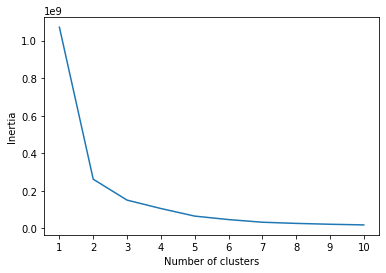

In [9]:
# trying to find the best K
from sklearn.cluster import KMeans

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(coffee_df)
    inertia.append(km.inertia_)


# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)


plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [10]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show() 

In [11]:
# Same dataset as before
y = coffee_df["total_cup_points"].values
X = coffee_df.drop("total_cup_points", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]


In [12]:
test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.9420567543856417
Test Score: 0.9583597279014427

Model: KNeighborsRegressor
Train score: 0.9538354395245838
Test Score: 0.9555396940320356

Model: RandomForestRegressor
Train score: 0.9976956754114562
Test Score: 0.982460835724622

Model: ExtraTreesRegressor
Train score: 0.9999999983617538
Test Score: 0.9826364880349643

Model: AdaBoostRegressor
Train score: 0.9786443326765295
Test Score: 0.970629358520981

Model: SVR
Train score: 0.968402170682052
Test Score: 0.9516711703813926



In [13]:
# y_train_scaled = y_train.reshape(1, -1)
# scaler = StandardScaler().fit(y_train_scaled)
# y_train_scaled = scaler.transform(y_train_scaled)

# y_test_scaled = y_test.reshape(1, -1)
# scaler = StandardScaler().fit(y_test_scaled)
# y_test_scaled = scaler.transform(y_test_scaled)

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 100

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, input_dim=number_input_features, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 50)                850       
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 6,307
Trainable params: 6,307
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
24/24 [==============================] - 5s 7ms/step - loss: 9.9201e-06 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 11ms/step - loss: 9.9201e-06 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 9.9201e-06 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 9.9201e-06 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 9ms/step - loss: 9.9201e-06 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 9.9201e-06 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 9.9201e-06 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 9.9201e-06 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 9.9201e-06 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [================

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 1s - loss: 9.9340e-06 - accuracy: 0.0000e+00 - 749ms/epoch - 94ms/step
Loss: 9.933957699104212e-06, Accuracy: 0.0


Using Flavor Dataframe

In [18]:
# Same dataset as before
y = flavor_df["total_cup_points"].values
X = flavor_df.drop("total_cup_points", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
32/32 [==============================] - 4s 4ms/step - loss: 600.0494 - accuracy: 9.9602e-04
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 437.2713 - accuracy: 9.9602e-04
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 222.5532 - accuracy: 0.0000e+00
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 61.1455 - accuracy: 0.0000e+00
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: -14.5475 - accuracy: 0.0000e+00
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: -70.6225 - accuracy: 0.0000e+00
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: -108.0502 - accuracy: 0.0000e+00
Epoch 8/50
32/32 [==============================] - 0s 6ms/step - loss: -141.8505 - accuracy: 0.0000e+00
Epoch 9/50
32/32 [==============================] - 0s 5ms/step - loss: -178.3139 - accuracy: 0.0000e+00
Epoch 10/50
32/32 [==============================] - 0s 5ms/st

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 1s - loss: -1.2371e+03 - accuracy: 0.0000e+00 - 621ms/epoch - 56ms/step
Loss: -1237.0526123046875, Accuracy: 0.0


demographic test

In [23]:
# Same dataset as before
y = demo_pt_df["total_cup_points"].values
X = demo_pt_df.drop("total_cup_points", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 10)                60        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
nn.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [30]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
24/24 [==============================] - 5s 6ms/step - loss: 6761.5298 - accuracy: 0.0000e+00
Epoch 2/50
24/24 [==============================] - 0s 7ms/step - loss: 6761.5259 - accuracy: 0.0000e+00
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 6761.5259 - accuracy: 0.0000e+00
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 6761.5244 - accuracy: 0.0000e+00
Epoch 5/50
24/24 [==============================] - 0s 8ms/step - loss: 6761.5254 - accuracy: 0.0000e+00
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 6761.5239 - accuracy: 0.0000e+00
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 6761.5239 - accuracy: 0.0000e+00
Epoch 8/50
24/24 [==============================] - 0s 5ms/step - loss: 6761.5234 - accuracy: 0.0000e+00
Epoch 9/50
24/24 [==============================] - 0s 5ms/step - loss: 6761.5234 - accuracy: 0.0000e+00
Epoch 10/50
24/24 [==============================] - 0s

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 1s - loss: -8.4558e+02 - accuracy: 0.0000e+00 - 617ms/epoch - 77ms/step
Loss: -845.5838012695312, Accuracy: 0.0
